In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting problem constants
p_i=2.64E-04 #cost of a VM ($/s)
p_n=3.50E-06 #cost of data transfer ($/KB)
H=8.50E-05 #static Hosting cost ($/s)
RPM=0.7 #revenue per 1000 ads ($)
R=100 #response time (ms)
gamma_l=1 #gamma lower bound (gamma is average number of ad banners per page)
gamma_u=25 #gamma upper bound
R_l=10 # respose time lower bound
R_u=3500 # response time upper bound
d_l=15 #capacity of each VM lower bound(request/s)
d_u=21 #capacity of each VM upper bound(request/s)

# Experiment 1
$$W_s = 1.0$$
$$W_a = 0.0$$
$$W_u = 0.0$$

In [3]:
exp1 = pd.read_csv("../data/EXP-1.csv")

In [4]:
exp1.drop('_id',axis=1,inplace=True)

In [5]:
exp1.set_index('cycle',inplace=True)

In [6]:
exp1.sort_values('cycle',inplace=True)

In [7]:
exp1 = exp1.iloc[1:]

In [8]:
exp1

,requests,concurrent_users,arrival_rate,response_time,data_payload,predicted_p_s,predicted_W,predicted_gamma,date
cycle,,,,,,,,,
1,20,5,516.10,9.688,32,0.002251,27.345830,3.970931,2020-09-20T07:28:32.685Z
2,1000,100,83.76,1193.935,589,0.002532,4.776614,4.211032,2020-09-20T07:30:37.530Z
3,400,50,90.69,551.339,589,0.002538,4.563223,3.816219,2020-09-20T07:31:48.487Z
4,300,30,89.80,334.088,589,0.002238,6.008172,3.761726,2020-09-20T07:32:54.432Z
5,160,20,91.49,218.605,589,0.002625,4.783823,4.030054,2020-09-20T07:34:00.763Z
...,...,...,...,...,...,...,...,...,...
917,100,20,77.76,257.199,589,0.002181,2.559657,3.319140,2020-09-21T09:22:41.386Z
918,20,5,80.12,62.407,589,0.002297,2.943657,3.516408,2020-09-21T09:25:59.707Z
919,1000,100,83.04,1204.311,589,0.002749,4.412686,4.107787,2020-09-21T09:27:14.424Z


In [9]:
exp1['W'] = exp1['predicted_W'].apply(lambda x: 10 if x>10 else np.ceil(x))
exp1.fillna(method='ffill',inplace=True)

## Number of containers

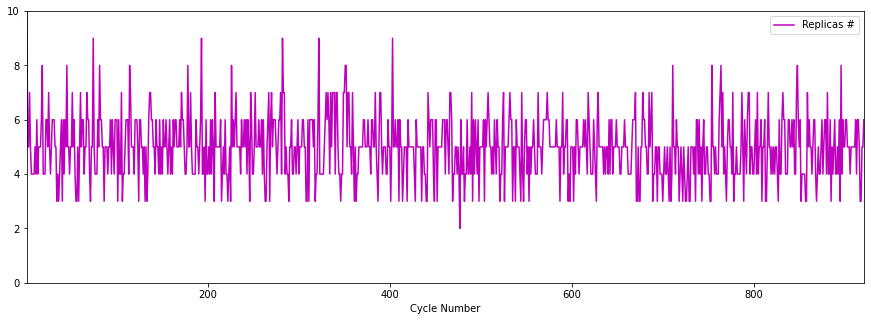

In [10]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
exp1['W'].plot(legend=True,label='Replicas #',color='m')
plt.xlabel('Cycle Number')
ax.set_ylim(0,10)
plt.savefig('exp1/replicas_number.png')

## Response time vs. Arrival rate

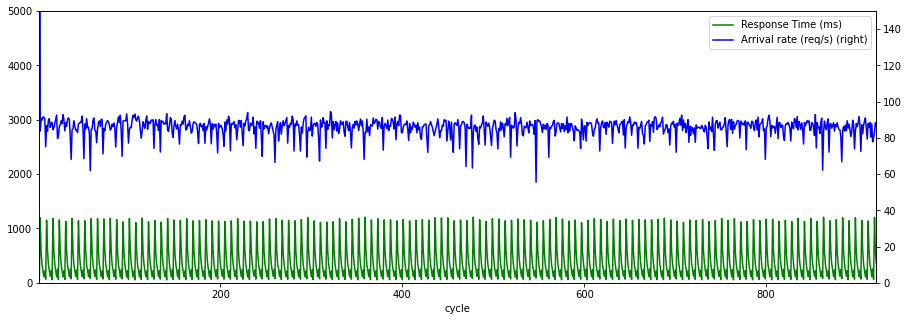

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
exp1['response_time'].plot(legend=True,label='Response Time (ms)',color='g')
exp1['arrival_rate'].plot(legend=True,label='Arrival rate (req/s)',secondary_y=True,color='b')
ax.set_ylim(0,5000)
ax.right_ax.set_ylim([0,150])

plt.savefig('exp1/response_time_vs_arrival_rate.png')

## service price vs avg. number of ads

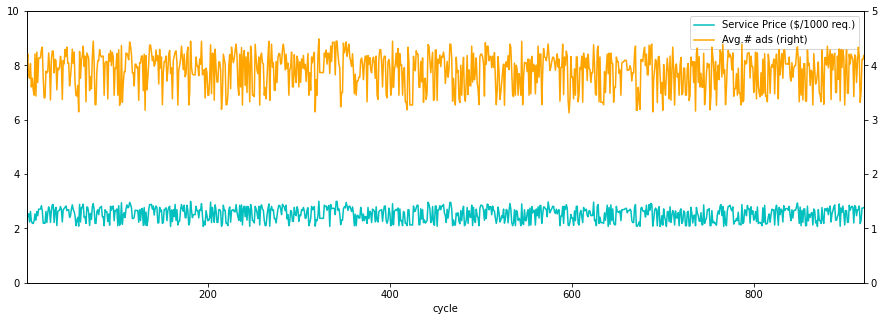

In [12]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
(exp1['predicted_p_s']*1000).plot(legend=True,label='Service Price ($/1000 req.)',color='c')
exp1['predicted_gamma'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='orange')
ax.set_ylim(0,10)
ax.right_ax.set_ylim([0,5])
plt.savefig('exp1/service_price_vs_#_of_ads.png')

## Service profit vs. Client profit vs user satisfaction

In [13]:
exp1['service_profit'] = exp1['predicted_p_s']*exp1['arrival_rate'] - p_i*exp1['W'] - exp1['data_payload']*p_n*exp1['arrival_rate']
exp1['client_profit'] = (exp1['predicted_gamma']*RPM/1000 - H - exp1['predicted_p_s'])*exp1['arrival_rate']
exp1['user_satisfaction'] = 0.5*(gamma_u - exp1['predicted_gamma'])/(gamma_u-gamma_l) + 0.5*(R_u - exp1['response_time'])/(R_u - R_l)

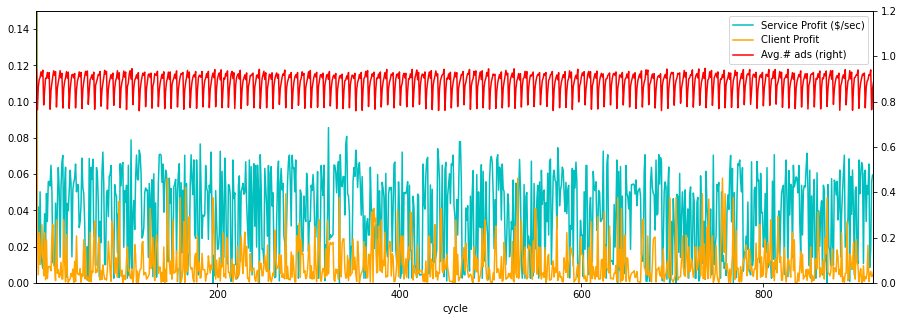

In [14]:
fig, ax = plt.subplots(figsize=(15,5)) # Create the figure and axes object
# plt.figure(num=None,)
# Plot the first x and y axes:
exp1['service_profit'].plot(legend=True,label='Service Profit ($/sec)',color='c')
exp1['client_profit'].plot(legend=True,label='Client Profit',color='orange')
exp1['user_satisfaction'].plot(legend=True,label='Avg.# ads',secondary_y=True,color='r')
ax.set_ylim(0,0.15)
ax.right_ax.set_ylim([0,1.2])
plt.savefig('exp1/service_profit_vs_client_profit_user_satisfaction.png')